In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('hotel_booking.csv')

# Basic Info
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nStatistical Summary:\n", df.describe(include='all'))


Shape of dataset: (19793, 36)

Data types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                    

                         Missing Values    Percent
country                             443   2.238165
agent                              3286  16.601829
company                           18445  93.189511
reservation_status_date               1   0.005052
name                                  1   0.005052
email                                 1   0.005052
phone-number                          1   0.005052
credit_card                           1   0.005052


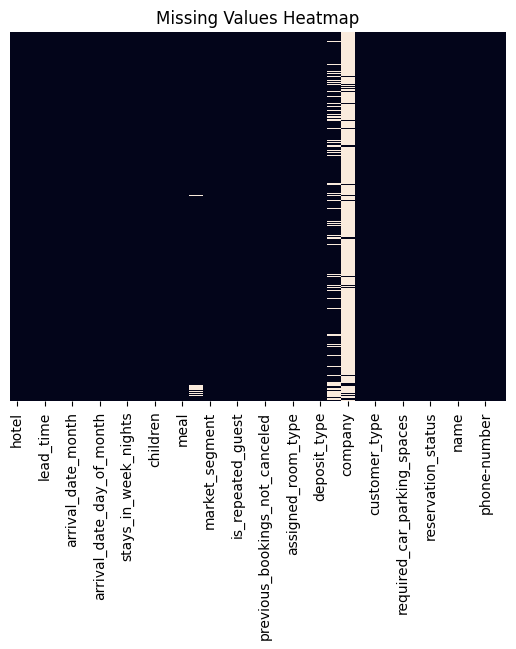

In [5]:
# Total missing values
missing = df.isnull().sum()
percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': percent})
print(missing_df[missing_df['Missing Values'] > 0])

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
# Children column: replace NaN with 0
df['children'].fillna(0, inplace=True)

# Country column: replace NaN with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Agent column: replace NaN with 0
df['agent'].fillna(0, inplace=True)

# Company column: replace NaN with 0
df['company'].fillna(0, inplace=True)


In [7]:
# Check duplicates
duplicates = df.duplicated()
print("Number of exact duplicates:", duplicates.sum())

# Remove duplicates
df = df.drop_duplicates()


Number of exact duplicates: 4944


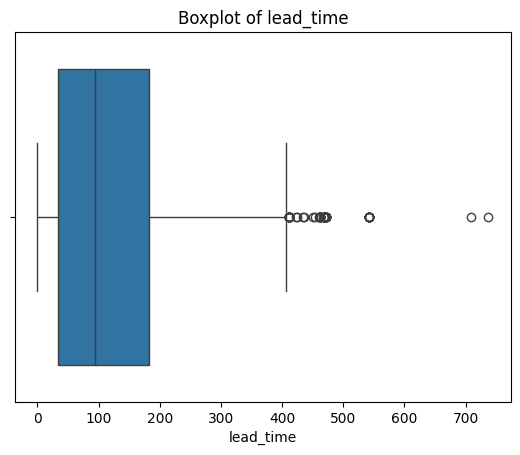

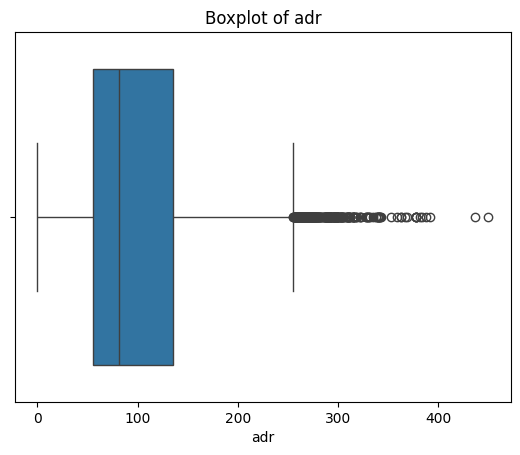

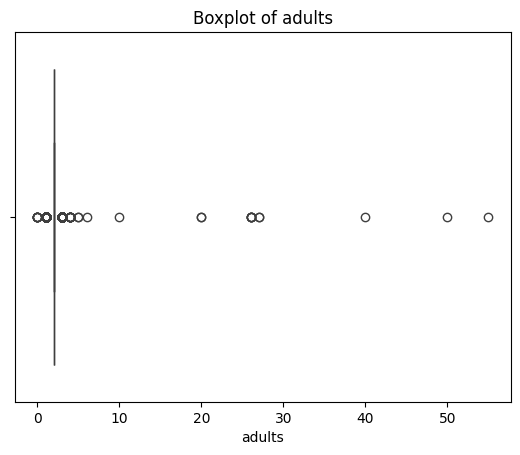

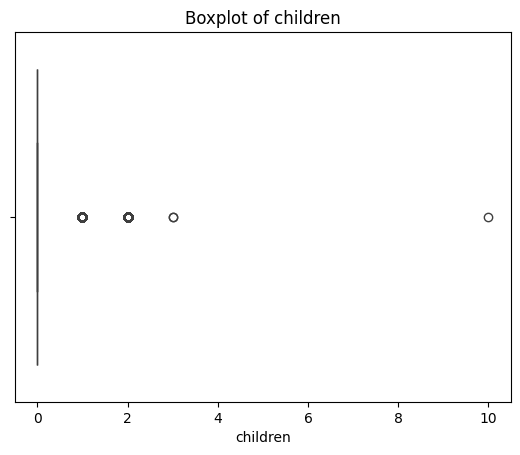

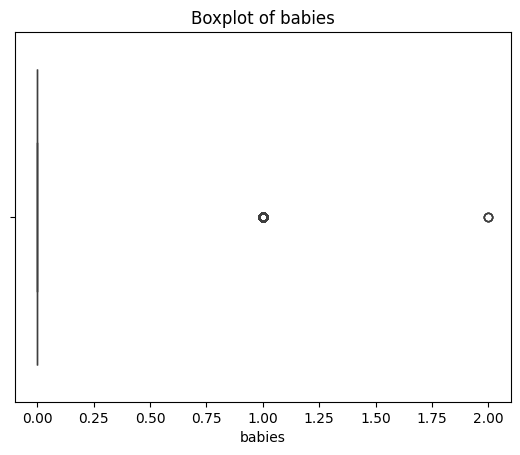

In [8]:
for col in ['lead_time', 'adr', 'adults', 'children', 'babies']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [9]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['adr'] >= lower) & (df['adr'] <= upper)]


In [10]:
# Remove rows with 0 adults, children, and babies
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]


In [11]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print("Guests <= 0:", df[df['total_guests'] <= 0].shape[0])


Guests <= 0: 0


In [12]:
df.to_csv('hotel_bookings_cleaned.csv', index=False)
